# Ch `04`: Concept `04` 

## Softmax classification

Import the usual libraries:

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Generated some initial 2D data:

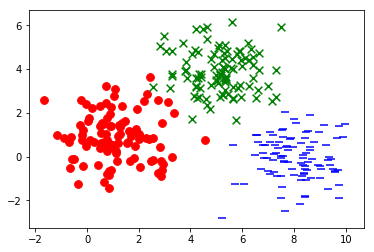

In [2]:
learning_rate = 0.01
training_epochs = 100
num_labels = 3
batch_size = 100

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))   # center (1,1)
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))   # center (5,4)
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))   # center (8,0)

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

Define the labels and shuffle the data:

In [3]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

# merge data
xs = np.vstack((xs_label0, xs_label1, xs_label2))

# labels --> one hot encoding
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

# shuffle
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

print(xs.shape)
print(labels.shape)

(300, 2)
(300, 3)


We'll get back to this later, but the following are test inputs that we'll use to evaluate the model:

In [4]:
# make test data
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))

test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

print(test_xs.shape)

(30, 2)


Again, define the placeholders, variables, model, and cost function:

In [5]:
train_size, num_features = xs.shape

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

# parameters
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Train the softmax classification model:

In [6]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        
        loss, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        if step % 100 == 0:
            print (step, loss)

    print('')
    W_val = sess.run(W)
    print('w', W_val)
    
    b_val = sess.run(b)
    print('b', b_val)
    
    print("accuracy :", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.86123
100 7.20969
200 3.5271623

w [[-1.2732166   0.17848177  1.0947375 ]
 [-0.1999897   1.769005   -1.5690134 ]]
b [ 6.2149076 -3.0365205 -3.1783857]
accuracy : 1.0
